# Интерполяционный многочлен

Задача. Даны точки $x_0, \dots, x_n$ и значения $y_0, \dots, y_n$ многочлена $f$ в этих точках. Найти многочлен $f$. 

Идея решения и ее реализация
$$
f_0=y_0, \quad f_1= f_0 + (y_1-f_0(x_1)) \frac{x-x_0}{x_1-x_0}, \quad f_2= f_1 + (y_2-f_1(x_2)) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_1-x_0)}, \dots 
$$

In [5]:
var("x")
def ipoly(points, x=x):
    m = 1
    f = 0
    for (X, Y) in points:
        f += (Y - f.subs([x==X]))*m/m.subs([x==X])
        m *= (x-X)
    return f

1.) Найдите многочлен, который удовлетворяет условиям 
$$f(1)=2, \quad f(2)=4, \quad f(3)=5$$
и постройте его график. Убедитесь, что график проходит через точки
$$
(1,2), \quad (2,4), \quad (3,5).
$$

In [9]:
points=[(1,2),(2,4),(3,5)]
show(ipoly(points)) 

-1/2*(x - 1)*(x - 2) + 2*x

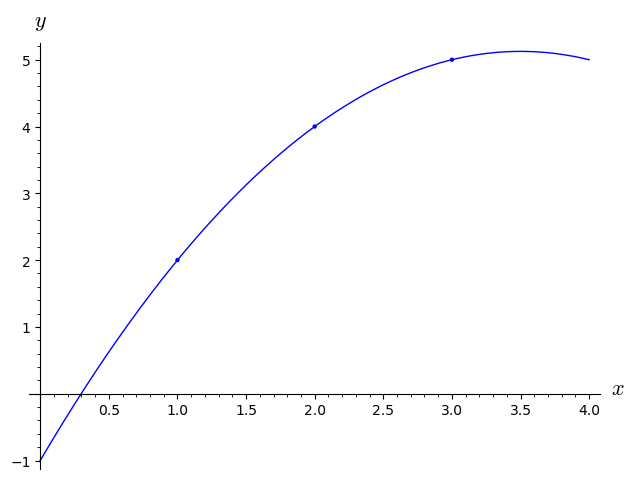

In [122]:
point(points, axes_labels=['$x$','$y$']) + plot(ipoly(points),(x,0,4))

2.) Однозначно ли определено решение задачи? -- Нет, с точностью до многочлена, кратного $(x-x_0)\dots(x-x_n)$.

In [123]:
points=[(1,2),(2,4),(3,5),(4,3)]
f=ipoly(points)
m=prod(x-xx for (xx,yy) in points)

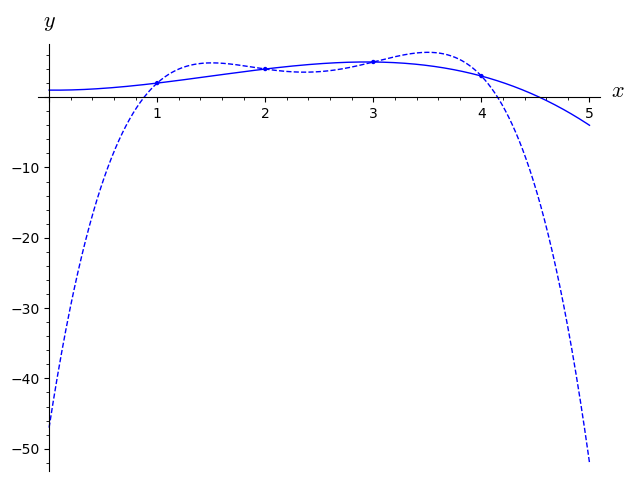

In [124]:
point(points, axes_labels=['$x$','$y$']) + plot(ipoly(points),(x,0,5)) +\
plot(ipoly(points) -2*m,(x,0,5), linestyle="--")

3.) Школьная задача. Составьте уравнение прямой, проходящей через точки 
$$
(1,2), \quad (3,5).
$$

In [92]:
var("y")
points=[(1,2),(3,5)]
f=ipoly(points)
y==f

y == 3/2*x + 1/2

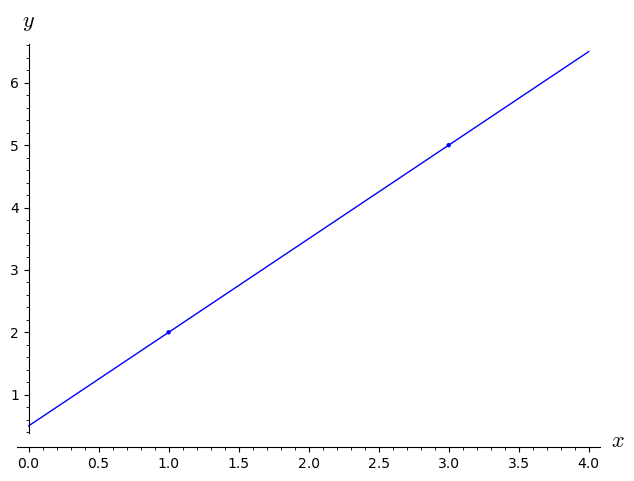

In [94]:
point(points, axes_labels=['$x$','$y$']) + plot(f,(x,0,4))

4.) Школьная задача. Составьте уравнение параболы, проходящей через точки 
$$
(1,2), \quad (2,1) \quad (3,5).
$$

In [96]:
var("y")
points=[(1,2),(2,1),(3,5)]
f=ipoly(points)
y==QQ[x](f)

y == 5/2*x^2 - 17/2*x + 8

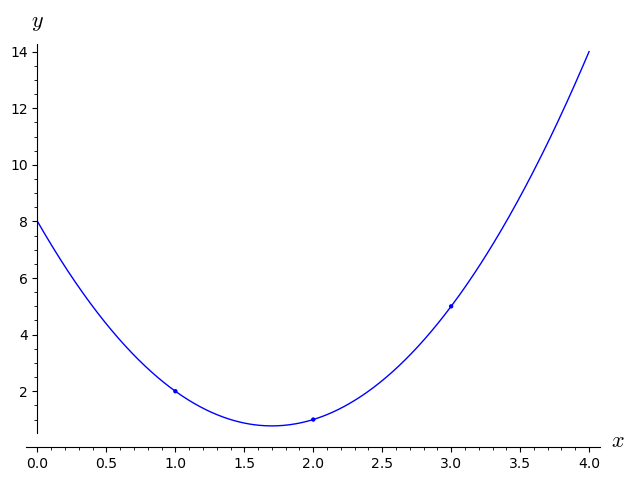

In [97]:
point(points, axes_labels=['$x$','$y$']) + plot(f,(x,0,4))

5.) Школьная задача. Найдите координаты вершины параболы, проходящей через точки 
$$
(1,2), \quad (2,-5) \quad (3,5).
$$

In [102]:
points=[(1,2),(2,-5),(3,5)]
f=ipoly(points)
S=solve(diff(f,x)==0,x)
p=(x.subs(S),f.subs(S))
p

(65/34, -689/136)

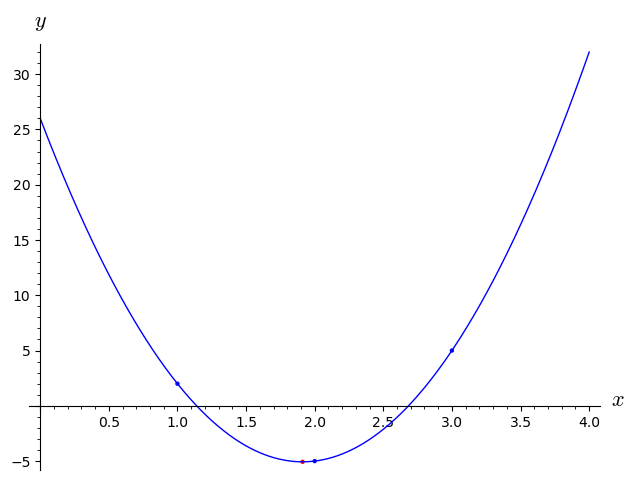

In [103]:
point(points, axes_labels=['$x$','$y$']) + plot(f,(x,0,4)) + point(p, color='red')

6.) Проверьте, что алгоритм работает над $\mathbb{Q}$, $\mathbb{R}$, $\mathbb{C}$, GF(5).

In [46]:
points=[(1,2),(2,4/3),(3,5),(4,3)]
f=ipoly(points)
print(QQ[x](f))
[f.subs(x=xx)-yy for (xx,yy) in points]

-5/3*x^3 + 73/6*x^2 - 51/2*x + 17


[0, 0, 0, 0]

In [47]:
points=[(1,2),(2,pi),(3,e),(e,3)]
f=ipoly(points)
print(RR[x](f))
[f.subs(x=xx)-yy for (xx,yy) in points]

-0.0118847696491323*x^3 - 0.711143121465477*x^2 + 3.35821540553015*x - 0.635187514415541


[0, 0, 0, 0]

In [48]:
points=[(1,2),(i,1),(-i,1),(4,3)]
f=ipoly(points)
print(CC[x](f))
[f.subs(x=xx)-yy for (xx,yy) in points]

-0.127450980392157*x^3 + 0.627450980392157*x^2 - 0.127450980392157*x + 1.62745098039216


[0, 0, 0, 0]

In [49]:
points=[(1,2),(2,4),(3,5),(4,3)]
f=ipoly(points)
print(GF(5)[x](f))
[f.subs(x=xx)-yy for (xx,yy) in points]

3*x^3 + 4*x^2 + 4*x + 1


[0, 0, 0, 0]

7.) Чтоб будет, если точек будет много? Что при этом происходит с графиками?

In [50]:
points=[(n,n^2) for n in range(10)]
f=ipoly(points)
print(QQ[x](f))
[f.subs(x=xx)-yy for (xx,yy) in points]

x^2


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [57]:
points=[(n,sin(n)) for n in range(10)]
f=ipoly(points)
print(RR[x](f))
sum([f.subs(x=xx)-yy for (xx,yy) in points])

-3.97978273709278e-7*x^9 + 9.15904316512248e-7*x^8 + 0.000296677757935423*x^7 - 0.00557313510190489*x^6 + 0.0384556956846447*x^5 - 0.0925802986317312*x^4 - 0.00370254525021532*x^3 - 0.150426326471244*x^2 + 1.05500039889437*x


0

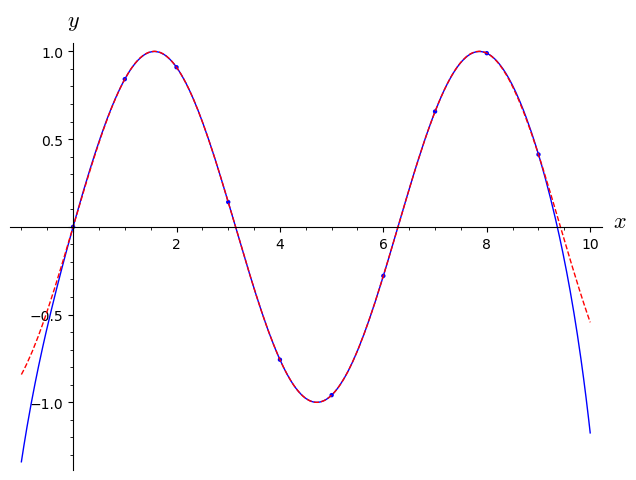

In [56]:
point(points, axes_labels=['$x$','$y$']) + plot(f,(x,-1,10)) + \
plot(sin,(-1,10),linestyle="--", color='red')

In [73]:
points=[(n,1/(1+n^2)) for n in range(100)]
f=ipoly(points)
print(QQ[x](f))
sum([f.subs(x=xx)-yy for (xx,yy) in points])

-6275590592831290811295279861770292775450687768152820189944889666710613340137316331/59336227023771490644419814410918945967050545648071920062246735210012671834167992127331325087284612776204909449598207659834504012756657046796118716283793182324197741969817116741484704884282454466710433610353008182155625000000000000000000000*x^99 + 496503069464208253438774290607456321531037752263021506714917236792434944163443023516281/949379632380343850310717030574703135472808730369150720995947763360202749346687874037301201396553804419278551193571322557352064204106512748737899460540690917187163871517073867863755278148519271467366937765648130914490000000000000000000000000*x^98 - 605532052031171254844034279068660004173777391774126263042886387179594220091820037233819427/474689816190171925155358515287351567736404365184575360497973881680101374673343937018650600698276902209639275596785661278676032102053256374368949730270345458593581935758536933931877639074259635733683468882824065457245000000000000000000000000*x

0

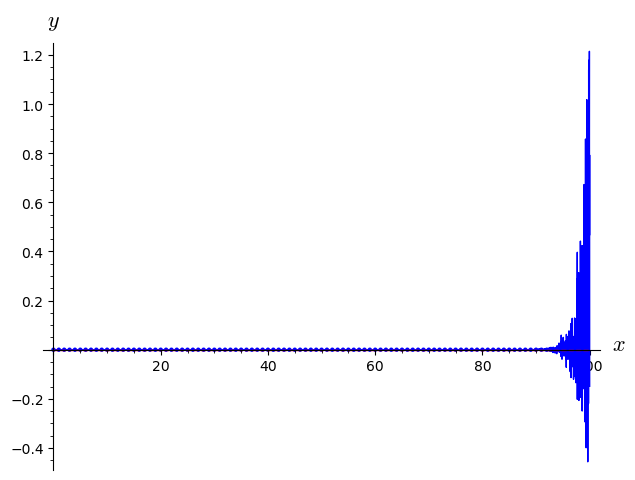

In [74]:
point(points, axes_labels=['$x$','$y$']) + plot(f,(x,0,100)) + \
plot(1/(1+x^2),(x,0,100),linestyle="--", color='red')

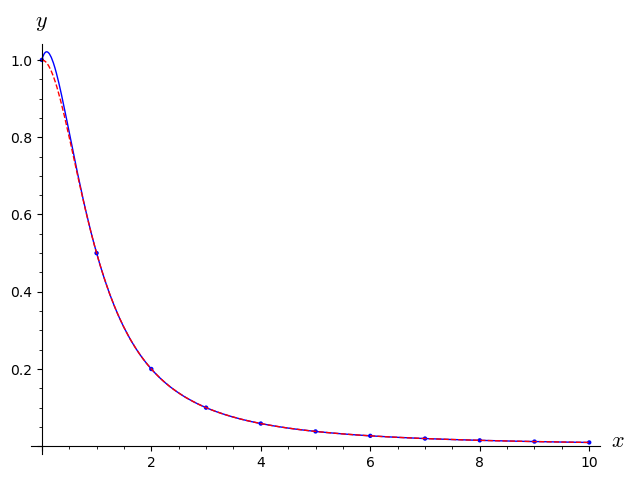

In [75]:
point(points, axes_labels=['$x$','$y$'], xmax=10) + plot(f,(x,0,10)) + \
plot(1/(1+x^2),(x,0,10),linestyle="--", color='red')

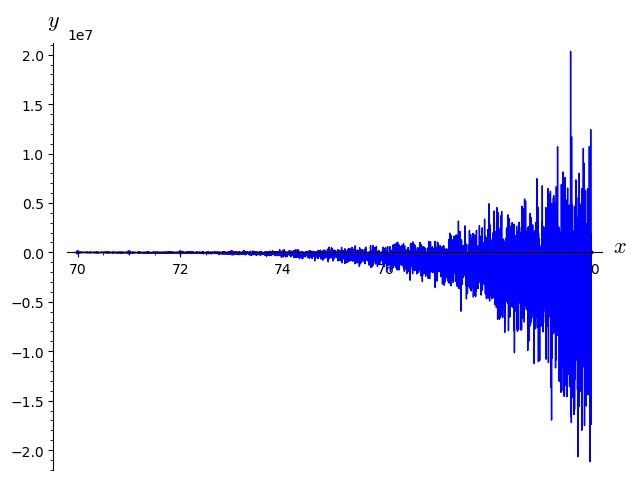

In [76]:
point(points, axes_labels=['$x$','$y$'], xmin=70, xmax=80) + plot(f,(x,70,80)) + \
plot(1/(1+x^2),(x,70,80),linestyle="--", color='red')

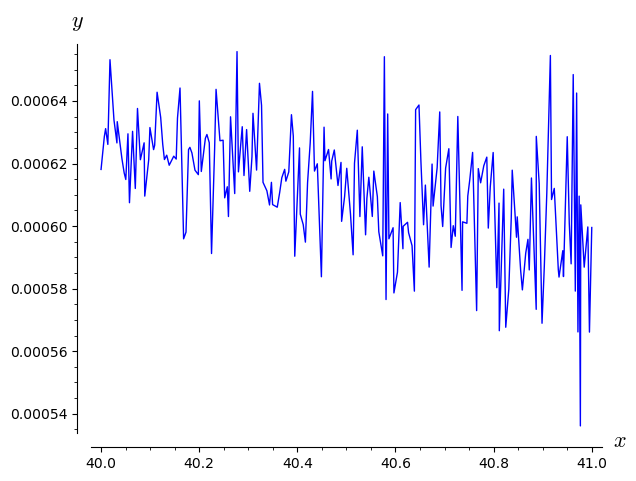

In [80]:
plot(f,(x,40,41),axes_labels=['$x$','$y$'])

Функция plot строит график, внося ошибку округления. Построим график по точкам.

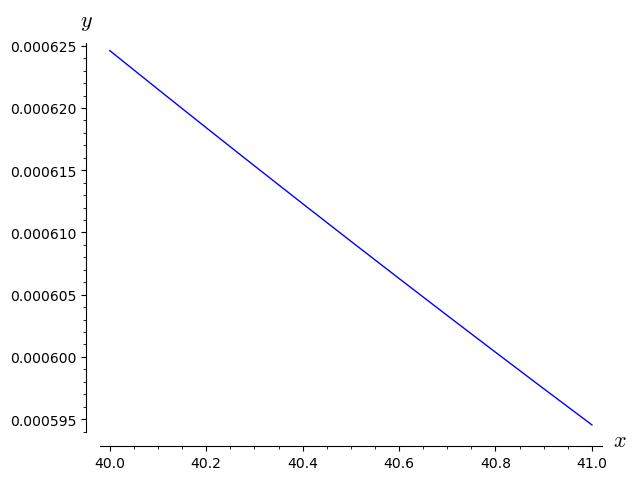

In [84]:
M=10
line([[40+m/M,f.subs(x=40+m/M)] for m in range(M+1)],axes_labels=['$x$','$y$'])

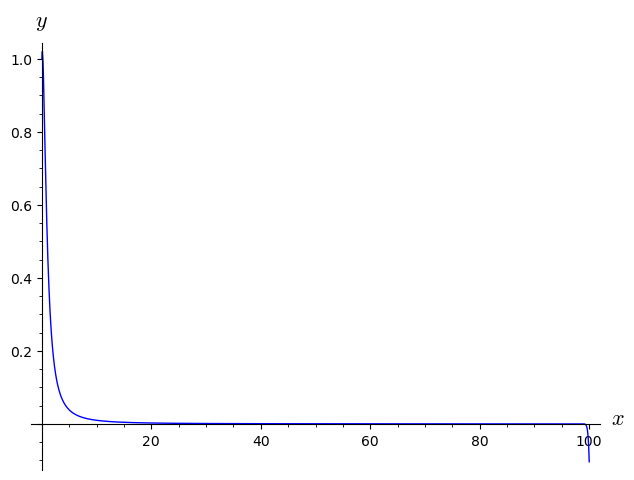

In [85]:
# Считается долго!
M=10
line([[m/M,f.subs(x=m/M)] for m in range(100*M+1)],axes_labels=['$x$','$y$'])

8.) Из школьного курса известны занчения синуса при 0, $\pi/6$, $\pi/4$, $\pi/3$ и $\pi/2$. Аппроксмируйте синус многочленом и вычислите $\sin(1)$.

In [106]:
xx=[0,pi/6, pi/4, pi/3, pi/2]
points=[(a,sin(a)) for a in xx]
f=ipoly(points)
RR[x](f)

0.0287971124604175*x^4 - 0.204340696021658*x^3 + 0.0213730075288633*x^2 + 0.995626184275261*x

In [107]:
f.subs(x=1).n()

0.841455608242884

In [108]:
sin(1).n()

0.841470984807897

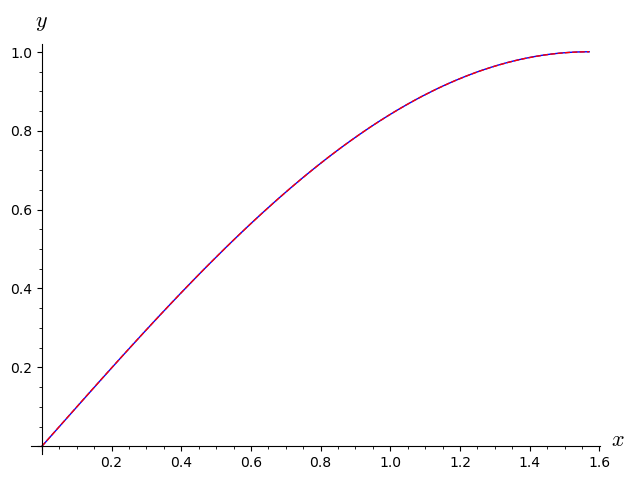

In [109]:
plot(f,(x,0,pi/2),axes_labels=['$x$','$y$']) + plot(sin,(0,pi/2), color="red", linestyle="--")

Трудный вопрос. Почему это работает? С какой точнсотью? Как связано с теоремой Лагранжа? -- Нужно рассмотреть
$$
g(x)=f(x)-\sin(x).
$$
По теореме Лагража
$$
g(1)=g(1)-g(\pi/3)=g'(c)\cdot (\pi/3-1)
$$
и поэтому
$$
|f(1)-\sin 1| \leq  0.05 \cdot (\max |f'| + 1)
$$
Остается оценить производную на рассматриваемом отрезке. 

In [112]:
RR[x](diff(f,x))

0.115188449841670*x^3 - 0.613022088064973*x^2 + 0.0427460150577266*x + 0.995626184275261

На отрезке $0<x <1$ это выражение меньше числа

In [118]:
sum([a for a in RR[x](diff(f,x)).coefficients()])

0.540538561109684

Поэтому
$$
|f(1)-\sin 1| \leq  1.6 \cdot 0.05 =0.08
$$
Оценка очень грубая. 